In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
import scipy.stats as stats

### Read data and show some statistics

In [2]:
solar_df = pd.read_csv("hessi.solar.flare.UP_To_2018.csv", sep=',', index_col=0)

''' Drop the flag columns'''
solar_df = solar_df.drop(["active.region.ar", "flag.1", "flag.2", "flag.3", "flag.4", "flag.5"], axis=1)

''' Some Radial Values are beyond 2000'''
solar_df = solar_df[solar_df["radial"] <960]

In [3]:
len(solar_df)

116014

In [4]:
solar_df

,start.date,start.time,peak,end,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial
flare,,,,,,,,,,,
2021213,2002-02-12,21:29:56,21:33:38,21:41:48,712,136,167304.0,12-25,592,-358,692
2021228,2002-02-12,21:44:08,21:45:06,21:48:56,288,7,9504.0,6-12,604,-341,694
2021332,2002-02-13,00:53:24,00:54:54,00:57:00,216,15,11448.0,6-12,-310,375,487
2021308,2002-02-13,04:22:52,04:23:50,04:26:56,244,20,17400.0,12-25,-277,378,469
2021310,2002-02-13,07:03:52,07:05:14,07:07:48,236,336,313392.0,25-50,-272,390,476
...,...,...,...,...,...,...,...,...,...,...,...
18020903,2018-02-09,16:41:28,16:42:54,16:43:32,124,18,2888.0,6-12,-345,-38,347
18020904,2018-02-09,18:15:56,18:17:26,18:17:40,104,16,1656.0,6-12,-268,-38,271
18021001,2018-02-10,13:04:36,13:06:46,13:07:04,148,15,2224.0,6-12,-115,-38,121


In [5]:
solar_df.isnull().sum()

start.date      0
start.time      0
peak            0
end             0
duration.s      0
peak.c/s        0
total.counts    0
energy.kev      0
x.pos.asec      0
y.pos.asec      0
radial          0
dtype: int64

In [6]:
solar_df.describe()

,duration.s,peak.c/s,total.counts,x.pos.asec,y.pos.asec,radial
count,116014.000000,116014.000000,1.160140e+05,116014.000000,116014.000000,116014.000000
mean,493.656628,215.093834,3.770958e+05,2.400133,-32.150973,674.397331
std,434.153313,839.589922,3.050433e+06,690.023292,258.457691,298.855830
min,8.000000,0.000000,8.000000e+00,-1242.000000,-1235.000000,0.000000
25%,212.000000,28.000000,2.286000e+04,-699.000000,-247.000000,467.000000
50%,364.000000,56.000000,5.860800e+04,0.000000,-71.000000,758.000000
75%,628.000000,144.000000,1.798572e+05,709.000000,198.000000,946.000000
max,4444.000000,113156.000000,4.355501e+08,1190.000000,1223.000000,1731.000000


In [7]:
solar_df.groupby('start.date').count()

,start.time,peak,end,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial
start.date,,,,,,,,,,
2002-02-12,2,2,2,2,2,2,2,2,2,2
2002-02-13,10,10,10,10,10,10,10,10,10,10
2002-02-14,11,11,11,11,11,11,11,11,11,11
2002-02-15,1,1,1,1,1,1,1,1,1,1
2002-02-16,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...
2018-02-08,3,3,3,3,3,3,3,3,3,3
2018-02-09,4,4,4,4,4,4,4,4,4,4
2018-02-10,1,1,1,1,1,1,1,1,1,1


### Parse data

In [8]:
# parse date, time
def parse_date(sdatex, stimex):
        datex = datetime.strptime(sdatex, '%Y-%m-%d')
        timex = datetime.strptime(stimex, '%H:%M:%S')
        return datetime(datex.year,datex.month,datex.day,timex.hour,timex.minute,timex.second)

In [9]:
# Adding year, month, day, start date, peak date, end date and dropping earlier columns
solar_df['dt.start'] = solar_df[['start.date','start.time']].apply(lambda x: parse_date(x[0],x[1]), axis=1)
solar_df['dt.peak'] = solar_df[['start.date','peak']].apply(lambda x: parse_date(x[0],x[1]), axis=1)
solar_df['dt.end'] = solar_df[['start.date','end']].apply(lambda x: parse_date(x[0],x[1]), axis=1)

solar_df.drop(['start.date','start.time','peak','end'], axis=1, inplace=True)

# add new columns
solar_df['year'] = solar_df['dt.start'].apply(lambda col: col.year)
solar_df['month'] = solar_df['dt.start'].apply(lambda col: col.month)
solar_df['day'] = solar_df['dt.start'].apply(lambda col: col.day)

In [10]:
solar_df.columns

Index(['duration.s', 'peak.c/s', 'total.counts', 'energy.kev', 'x.pos.asec',
       'y.pos.asec', 'radial', 'dt.start', 'dt.peak', 'dt.end', 'year',
       'month', 'day'],
      dtype='object')

In [11]:
solar_df = solar_df.rename(columns={'duration.s': 'duration', 'peak.c/s': 'peak_c_s', 'total.counts': 'total_counts', 
                                    'energy.kev': 'energy_kev', 'x.pos.asec': 'x_pos', 'y.pos.asec': 'y_pos', 
                                    'dt.start': 'date_start', 'dt.peak':'date_peak', 'dt.end': 'date_end'})

In [12]:
solar_df.columns

Index(['duration', 'peak_c_s', 'total_counts', 'energy_kev', 'x_pos', 'y_pos',
       'radial', 'date_start', 'date_peak', 'date_end', 'year', 'month',
       'day'],
      dtype='object')

In [13]:
solar_df

,duration,peak_c_s,total_counts,energy_kev,x_pos,y_pos,radial,date_start,date_peak,date_end,year,month,day
flare,,,,,,,,,,,,,
2021213,712,136,167304.0,12-25,592,-358,692,2002-02-12 21:29:56,2002-02-12 21:33:38,2002-02-12 21:41:48,2002,2,12
2021228,288,7,9504.0,6-12,604,-341,694,2002-02-12 21:44:08,2002-02-12 21:45:06,2002-02-12 21:48:56,2002,2,12
2021332,216,15,11448.0,6-12,-310,375,487,2002-02-13 00:53:24,2002-02-13 00:54:54,2002-02-13 00:57:00,2002,2,13
2021308,244,20,17400.0,12-25,-277,378,469,2002-02-13 04:22:52,2002-02-13 04:23:50,2002-02-13 04:26:56,2002,2,13
2021310,236,336,313392.0,25-50,-272,390,476,2002-02-13 07:03:52,2002-02-13 07:05:14,2002-02-13 07:07:48,2002,2,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18020903,124,18,2888.0,6-12,-345,-38,347,2018-02-09 16:41:28,2018-02-09 16:42:54,2018-02-09 16:43:32,2018,2,9
18020904,104,16,1656.0,6-12,-268,-38,271,2018-02-09 18:15:56,2018-02-09 18:17:26,2018-02-09 18:17:40,2018,2,9
18021001,148,15,2224.0,6-12,-115,-38,121,2018-02-10 13:04:36,2018-02-10 13:06:46,2018-02-10 13:07:04,2018,2,10


In [14]:
# Enumerating energy range values from str to category
category = {'3-6': 0, '6-12': 1, '12-25': 2, '25-50': 3, '50-100': 4, '100-300': 5, '300-800': 6, '800-7000': 7, '7000-20000': 8}
solar_df['energy_kev'] = solar_df['energy_kev'].map(category)

In [15]:
# Deal with the skewed duration data using log transform
solar_df['duration'] = np.log1p(solar_df['duration'])

/opt/homebrew/Caskroom/miniforge/base/envs/cse258/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of duration'}, xlabel='duration'>

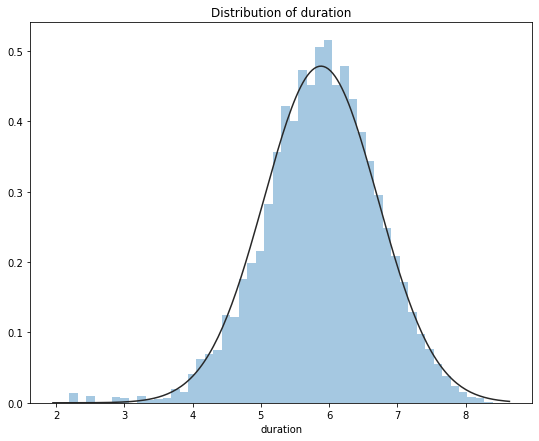

In [16]:
plt.figure(figsize=(9,7))
plt.title('Distribution of duration')
sns.distplot(solar_df['duration'], kde=False,fit=stats.norm)

In [17]:
solar_df = solar_df.drop(['date_start', 'date_peak', 'date_end'], axis=1)

In [18]:
solar_df.head(5)

,duration,peak_c_s,total_counts,energy_kev,x_pos,y_pos,radial,year,month,day
flare,,,,,,,,,,
2021213,6.569481,136,167304.0,2,592,-358,692,2002,2,12
2021228,5.666427,7,9504.0,1,604,-341,694,2002,2,12
2021332,5.379897,15,11448.0,1,-310,375,487,2002,2,13
2021308,5.501258,20,17400.0,2,-277,378,469,2002,2,13
2021310,5.468060,336,313392.0,3,-272,390,476,2002,2,13


In [19]:
solar_df.dtypes

duration        float64
peak_c_s          int64
total_counts    float64
energy_kev        int64
x_pos             int64
y_pos             int64
radial            int64
year              int64
month             int64
day               int64
dtype: object

### Create Train/Test Set

In [20]:
pd_df = solar_df.copy(deep=True)

In [21]:
pd_df.head(5)

,duration,peak_c_s,total_counts,energy_kev,x_pos,y_pos,radial,year,month,day
flare,,,,,,,,,,
2021213,6.569481,136,167304.0,2,592,-358,692,2002,2,12
2021228,5.666427,7,9504.0,1,604,-341,694,2002,2,12
2021332,5.379897,15,11448.0,1,-310,375,487,2002,2,13
2021308,5.501258,20,17400.0,2,-277,378,469,2002,2,13
2021310,5.468060,336,313392.0,3,-272,390,476,2002,2,13


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(pd_df, test_size=0.2)

In [23]:
X_train.shape, X_test.shape

((92811, 10), (23203, 10))

### Predcition for energy_kev
Best result - Random Forest 0.8654

In [24]:
y_train_energy = X_train['energy_kev']
X_train_energy = X_train.drop(['energy_kev', 'duration'], axis=1)

y_test_energy = X_test['energy_kev']
X_test_energy = X_test.drop(['energy_kev', 'duration'], axis=1)

In [25]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression().fit(X_train_energy, y_train_energy)
logistic_regression_predictions = logistic_regression.predict(X_test_energy)
logistic_regression_score = logistic_regression.score(X_test_energy, y_test_energy)
logistic_regression_score_train = logistic_regression.score(X_train_energy, y_train_energy)
logistic_regression_score, logistic_regression_score_train

/opt/homebrew/Caskroom/miniforge/base/envs/cse258/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.774770503814162, 0.7750589908523774)

In [26]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier().fit(X_train_energy, y_train_energy)
decision_tree_predictions = decision_tree_classifier.predict(X_test_energy)
decision_tree_score = decision_tree_classifier.score(X_test_energy, y_test_energy)
decision_tree_score_train = decision_tree_classifier.score(X_train_energy, y_train_energy)
decision_tree_score, decision_tree_score_train

(0.8024393397405508, 1.0)

In [27]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(n_jobs=-1).fit(X_train_energy, y_train_energy)
random_forest_predictions = random_forest_classifier.predict(X_test_energy)
random_forest_score = random_forest_classifier.score(X_test_energy, y_test_energy)
random_forest_score_train = random_forest_classifier.score(X_train_energy, y_train_energy)
random_forest_score, random_forest_score_train

(0.8654484333922338, 0.9999676762452726)

In [28]:
# K-nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
kneighbors_classifier = KNeighborsClassifier().fit(X_train_energy, y_train_energy)
kneighbors_predictions = kneighbors_classifier.predict(X_test_energy)
kneighbors_score = kneighbors_classifier.score(X_test_energy, y_test_energy)
kneighbors_score_train = kneighbors_classifier.score(X_train_energy, y_train_energy)
kneighbors_score, kneighbors_score_train

(0.7981295522130759, 0.8454385794787256)

In [29]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gradient_classifier = GradientBoostingClassifier().fit(X_train_energy, y_train_energy)
gradient_classifier_predictions = gradient_classifier.predict(X_test_energy)
gradient_classifier_score = gradient_classifier.score(X_test_energy, y_test_energy)
gradient_classifier_score_train = gradient_classifier.score(X_train_energy, y_train_energy)
gradient_classifier_score, gradient_classifier_score_train

(0.8604059819850881, 0.865188393617136)

In [30]:
# Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier
AdaBoost_classifier = AdaBoostClassifier().fit(X_train_energy, y_train_energy)
AdaBoost_classifier_predictions = AdaBoost_classifier.predict(X_test_energy)
AdaBoost_classifier_score = AdaBoost_classifier.score(X_test_energy, y_test_energy)
AdaBoost_classifier_score_train = AdaBoost_classifier.score(X_train_energy, y_train_energy)
AdaBoost_classifier_score, AdaBoost_classifier_score_train

(0.7471878636383227, 0.748909073277952)

In [31]:
# Bagging Classifier
from sklearn.ensemble import BaggingClassifier
Bagging_classifier = BaggingClassifier().fit(X_train_energy, y_train_energy)
Bagging_classifier_predictions = Bagging_classifier.predict(X_test_energy)
Bagging_classifier_score = Bagging_classifier.score(X_test_energy, y_test_energy)
Bagging_classifier_score_train = Bagging_classifier.score(X_train_energy, y_train_energy)
Bagging_classifier_score, Bagging_classifier_score_train

(0.8560099987070637, 0.9863486009201495)

In [32]:
# Using Neural Network (scikit-learn)
from sklearn.neural_network import MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,10)).fit(X_train_energy, y_train_energy)
mlp_predictions = mlp_classifier.predict(X_test_energy)
mlp_score = mlp_classifier.score(X_test_energy, y_test_energy)
mlp_score_train = mlp_classifier.score(X_train_energy, y_train_energy)
mlp_score, mlp_score_train

(0.7511959660388743, 0.7526263050715971)

### Prediction for duration
Best result - Random Forest 0.8485

In [33]:
y_train_duration = X_train['duration']
X_train_duration = X_train.drop(['energy_kev', 'duration'], axis=1)

y_test_duration = X_test['duration']
X_test_duration = X_test.drop(['energy_kev', 'duration'], axis=1)

In [34]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor().fit(X_train_duration, y_train_duration)
decision_tree_predictions = decision_tree_regressor.predict(X_test_duration)
decision_tree_score = decision_tree_regressor.score(X_test_duration, y_test_duration)
decision_tree_score_train = decision_tree_regressor.score(X_train_duration, y_train_duration)
decision_tree_score, decision_tree_score_train

(0.7022304403176083, 0.9999999924808528)

In [35]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
random_forest_regressor = RandomForestRegressor(n_jobs=-1).fit(X_train_duration, y_train_duration)
random_forest_predictions = random_forest_regressor.predict(X_test_duration)
random_forest_score = random_forest_regressor.score(X_test_duration, y_test_duration)
random_forest_score_train = random_forest_regressor.score(X_train_duration, y_train_duration)
random_forest_score, random_forest_score_train

(0.8485275601811125, 0.978831595873602)

In [36]:
# K-nearest Neighbors
from sklearn.neighbors import KNeighborsRegressor
kneighbors_regressor = KNeighborsRegressor().fit(X_train_duration, y_train_duration)
kneighbors_predictions = kneighbors_regressor.predict(X_test_duration)
kneighbors_score = kneighbors_regressor.score(X_test_duration, y_test_duration)
kneighbors_score_train = kneighbors_regressor.score(X_train_duration, y_train_duration)
kneighbors_score, kneighbors_score_train

(0.5527542535458652, 0.7041483578902605)

In [37]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gradient_regressor = GradientBoostingRegressor().fit(X_train_duration, y_train_duration)
gradient_regressor_predictions = gradient_regressor.predict(X_test_duration)
gradient_regressor_score = gradient_regressor.score(X_test_duration, y_test_duration)
gradient_regressor_score_train = gradient_regressor.score(X_train_duration, y_train_duration)
gradient_regressor_score, gradient_regressor_score_train

(0.8296915178765796, 0.8328101194167794)

In [38]:
# Adaboost Regressor
from sklearn.ensemble import AdaBoostRegressor
AdaBoost_regressor = AdaBoostRegressor().fit(X_train_duration, y_train_duration)
AdaBoost_regressor_predictions = AdaBoost_regressor.predict(X_test_duration)
AdaBoost_regressor_score = AdaBoost_regressor.score(X_test_duration, y_test_duration)
AdaBoost_regressor_score_train = AdaBoost_regressor.score(X_train_duration, y_train_duration)
AdaBoost_regressor_score, AdaBoost_regressor_score_train

(0.5485602018162443, 0.5408951097100183)

In [39]:
# Bagging Regressor
from sklearn.ensemble import BaggingRegressor
Bagging_regressor = BaggingRegressor().fit(X_train_duration, y_train_duration)
Bagging_regressor_predictions = Bagging_regressor.predict(X_test_duration)
Bagging_regressor_score = Bagging_regressor.score(X_test_duration, y_test_duration)
Bagging_regressor_score_train = Bagging_regressor.score(X_train_duration, y_train_duration)
Bagging_regressor_score, Bagging_regressor_score_train

(0.8339552693018272, 0.9704549196411737)

### Prediction for x.pos
Best result - Random Forest 0.6834

In [40]:
y_train_xpos = X_train['x_pos']
X_train_xpos = X_train.drop(['x_pos', 'y_pos'], axis=1)

y_test_xpos = X_test['x_pos']
X_test_xpos = X_test.drop(['x_pos', 'y_pos'], axis=1)

In [41]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor().fit(X_train_xpos, y_train_xpos)
decision_tree_predictions = decision_tree_regressor.predict(X_test_xpos)
decision_tree_score = decision_tree_regressor.score(X_test_xpos, y_test_xpos)
decision_tree_score_train = decision_tree_regressor.score(X_train_xpos, y_train_xpos)
decision_tree_score, decision_tree_score_train

(0.421346948735016, 1.0)

In [42]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
random_forest_regressor = RandomForestRegressor(n_jobs=-1).fit(X_train_xpos, y_train_xpos)
random_forest_predictions = random_forest_regressor.predict(X_test_xpos)
random_forest_score = random_forest_regressor.score(X_test_xpos, y_test_xpos)
random_forest_score_train = random_forest_regressor.score(X_train_xpos, y_train_xpos)
random_forest_score, random_forest_score_train

(0.6834160221177964, 0.9566680879042647)

In [43]:
# Bagging Regressor
from sklearn.ensemble import BaggingRegressor
Bagging_regressor = BaggingRegressor().fit(X_train_xpos, y_train_xpos)
Bagging_regressor_predictions = Bagging_regressor.predict(X_test_xpos)
Bagging_regressor_score = Bagging_regressor.score(X_test_xpos, y_test_xpos)
Bagging_regressor_score_train = Bagging_regressor.score(X_train_xpos, y_train_xpos)
Bagging_regressor_score, Bagging_regressor_score_train

(0.6453550326926839, 0.937518047954645)

### Prediction for y.pos
Best result - Random Forest 0.6329

In [44]:
y_train_ypos = X_train['y_pos']
X_train_ypos = X_train.drop(['x_pos', 'y_pos'], axis=1)

y_test_ypos = X_test['y_pos']
X_test_ypos = X_test.drop(['x_pos', 'y_pos'], axis=1)

In [45]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor().fit(X_train_ypos, y_train_ypos)
decision_tree_predictions = decision_tree_regressor.predict(X_test_ypos)
decision_tree_score = decision_tree_regressor.score(X_test_ypos, y_test_ypos)
decision_tree_score_train = decision_tree_regressor.score(X_train_ypos, y_train_ypos)
decision_tree_score, decision_tree_score_train

(0.3155490480268641, 1.0)

In [46]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
random_forest_regressor = RandomForestRegressor(n_jobs=-1).fit(X_train_ypos, y_train_ypos)
random_forest_predictions = random_forest_regressor.predict(X_test_ypos)
random_forest_score = random_forest_regressor.score(X_test_ypos, y_test_ypos)
random_forest_score_train = random_forest_regressor.score(X_train_ypos, y_train_ypos)
random_forest_score, random_forest_score_train

(0.6329472081334493, 0.950245396871364)

In [47]:
# Bagging Regressor
from sklearn.ensemble import BaggingRegressor
Bagging_regressor = BaggingRegressor().fit(X_train_ypos, y_train_ypos)
Bagging_regressor_predictions = Bagging_regressor.predict(X_test_ypos)
Bagging_regressor_score = Bagging_regressor.score(X_test_ypos, y_test_ypos)
Bagging_regressor_score_train = Bagging_regressor.score(X_train_ypos, y_train_ypos)
Bagging_regressor_score, Bagging_regressor_score_train

(0.6044076115448277, 0.9293149136107216)

### Predict duration using x_pos, y_pos, radial, energy, total_counts, peak_c_s (w/o year month day)
Best Result on test set - Random Forest 0.8041

In [48]:
y_train_duration = X_train['duration']
X_train_duration = X_train.drop(['duration', 'year', 'month', 'day'], axis=1)

y_test_duration = X_test['duration']
X_test_duration = X_test.drop(['duration', 'year', 'month', 'day'], axis=1)

In [49]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor().fit(X_train_duration, y_train_duration)
decision_tree_predictions = decision_tree_regressor.predict(X_test_duration)
decision_tree_score = decision_tree_regressor.score(X_test_duration, y_test_duration)
decision_tree_score_train = decision_tree_regressor.score(X_train_duration, y_train_duration)
decision_tree_score, decision_tree_score_train

(0.6273186138303337, 0.9999641784412273)

In [50]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
random_forest_regressor = RandomForestRegressor(n_jobs=-1).fit(X_train_duration, y_train_duration)
random_forest_predictions = random_forest_regressor.predict(X_test_duration)
random_forest_score = random_forest_regressor.score(X_test_duration, y_test_duration)
random_forest_score_train = random_forest_regressor.score(X_train_duration, y_train_duration)
random_forest_score, random_forest_score_train

(0.8041436707663675, 0.9723612600598726)

In [51]:
# K-nearest Neighbors
from sklearn.neighbors import KNeighborsRegressor
kneighbors_regressor = KNeighborsRegressor().fit(X_train_duration, y_train_duration)
kneighbors_predictions = kneighbors_regressor.predict(X_test_duration)
kneighbors_score = kneighbors_regressor.score(X_test_duration, y_test_duration)
kneighbors_score_train = kneighbors_regressor.score(X_train_duration, y_train_duration)
kneighbors_score, kneighbors_score_train

(0.552922660737908, 0.7044149659284096)

In [52]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gradient_regressor = GradientBoostingRegressor().fit(X_train_duration, y_train_duration)
gradient_regressor_predictions = gradient_regressor.predict(X_test_duration)
gradient_regressor_score = gradient_regressor.score(X_test_duration, y_test_duration)
gradient_regressor_score_train = gradient_regressor.score(X_train_duration, y_train_duration)
gradient_regressor_score, gradient_regressor_score_train

(0.8040065701832725, 0.8083871960392541)

In [53]:
# Adaboost Regressor
from sklearn.ensemble import AdaBoostRegressor
AdaBoost_regressor = AdaBoostRegressor().fit(X_train_duration, y_train_duration)
AdaBoost_regressor_predictions = AdaBoost_regressor.predict(X_test_duration)
AdaBoost_regressor_score = AdaBoost_regressor.score(X_test_duration, y_test_duration)
AdaBoost_regressor_score_train = AdaBoost_regressor.score(X_train_duration, y_train_duration)
AdaBoost_regressor_score, AdaBoost_regressor_score_train

(0.5856554288404685, 0.5805332579678573)

In [54]:
# Bagging Regressor
from sklearn.ensemble import BaggingRegressor
Bagging_regressor = BaggingRegressor().fit(X_train_duration, y_train_duration)
Bagging_regressor_predictions = Bagging_regressor.predict(X_test_duration)
Bagging_regressor_score = Bagging_regressor.score(X_test_duration, y_test_duration)
Bagging_regressor_score_train = Bagging_regressor.score(X_train_duration, y_train_duration)
Bagging_regressor_score, Bagging_regressor_score_train

(0.7870965887178738, 0.9623861866802573)

### Predict duration using x_pos, y_pos, energy_kev, total_counts
Best result - Gradient Boosting 0.5982

In [62]:
y_train_duration = X_train['duration']
X_train_duration = X_train[['x_pos', 'y_pos', 'energy_kev', 'total_counts']]

y_test_duration = X_test['duration']
X_test_duration = X_test[['x_pos', 'y_pos', 'energy_kev', 'total_counts']]

In [63]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor().fit(X_train_duration, y_train_duration)
decision_tree_predictions = decision_tree_regressor.predict(X_test_duration)
decision_tree_score = decision_tree_regressor.score(X_test_duration, y_test_duration)
decision_tree_score_train = decision_tree_regressor.score(X_train_duration, y_train_duration)
decision_tree_score, decision_tree_score_train

(0.1890821052708428, 0.997590222878304)

In [64]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
random_forest_regressor = RandomForestRegressor(n_jobs=-1).fit(X_train_duration, y_train_duration)
random_forest_predictions = random_forest_regressor.predict(X_test_duration)
random_forest_score = random_forest_regressor.score(X_test_duration, y_test_duration)
random_forest_score_train = random_forest_regressor.score(X_train_duration, y_train_duration)
random_forest_score, random_forest_score_train

(0.5487185182938721, 0.9369869113286888)

In [65]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gradient_regressor = GradientBoostingRegressor().fit(X_train_duration, y_train_duration)
gradient_regressor_predictions = gradient_regressor.predict(X_test_duration)
gradient_regressor_score = gradient_regressor.score(X_test_duration, y_test_duration)
gradient_regressor_score_train = gradient_regressor.score(X_train_duration, y_train_duration)
gradient_regressor_score, gradient_regressor_score_train

(0.5982596708825935, 0.6077124455463709)

In [66]:
# Adaboost Regressor
from sklearn.ensemble import AdaBoostRegressor
AdaBoost_regressor = AdaBoostRegressor().fit(X_train_duration, y_train_duration)
AdaBoost_regressor_predictions = AdaBoost_regressor.predict(X_test_duration)
AdaBoost_regressor_score = AdaBoost_regressor.score(X_test_duration, y_test_duration)
AdaBoost_regressor_score_train = AdaBoost_regressor.score(X_train_duration, y_train_duration)
AdaBoost_regressor_score, AdaBoost_regressor_score_train

(0.5595522807950908, 0.5642892285832096)

In [67]:
# Bagging Regressor
from sklearn.ensemble import BaggingRegressor
Bagging_regressor = BaggingRegressor().fit(X_train_duration, y_train_duration)
Bagging_regressor_predictions = Bagging_regressor.predict(X_test_duration)
Bagging_regressor_score = Bagging_regressor.score(X_test_duration, y_test_duration)
Bagging_regressor_score_train = Bagging_regressor.score(X_train_duration, y_train_duration)
Bagging_regressor_score, Bagging_regressor_score_train

(0.5141953391291021, 0.9161011495976533)

### Predict total counts using x_pos, y_pos, energy_kev, duration
Best result - Gradient Boosting 0.2277

In [68]:
y_train_counts = X_train['total_counts']
X_train_counts = X_train[['x_pos', 'y_pos', 'energy_kev', 'duration']]

y_test_counts = X_test['total_counts']
X_test_counts = X_test[['x_pos', 'y_pos', 'energy_kev', 'duration']]

In [71]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
random_forest_regressor = RandomForestRegressor(n_jobs=-1).fit(X_train_counts, y_train_counts)
random_forest_predictions = random_forest_regressor.predict(X_test_counts)
random_forest_score = random_forest_regressor.score(X_test_counts, y_test_counts)
random_forest_score_train = random_forest_regressor.score(X_train_counts, y_train_counts)
random_forest_score, random_forest_score_train

(0.08804013779237807, 0.8742934338152062)

In [72]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gradient_regressor = GradientBoostingRegressor().fit(X_train_counts, y_train_counts)
gradient_regressor_predictions = gradient_regressor.predict(X_test_counts)
gradient_regressor_score = gradient_regressor.score(X_test_counts, y_test_counts)
gradient_regressor_score_train = gradient_regressor.score(X_train_counts, y_train_counts)
gradient_regressor_score, gradient_regressor_score_train

(0.22773367148476842, 0.7730226038570032)

In [73]:
# Adaboost Regressor
from sklearn.ensemble import AdaBoostRegressor
AdaBoost_regressor = AdaBoostRegressor().fit(X_train_counts, y_train_counts)
AdaBoost_regressor_predictions = AdaBoost_regressor.predict(X_test_counts)
AdaBoost_regressor_score = AdaBoost_regressor.score(X_test_counts, y_test_counts)
AdaBoost_regressor_score_train = AdaBoost_regressor.score(X_train_counts, y_train_counts)
AdaBoost_regressor_score, AdaBoost_regressor_score_train

(0.0848538167827505, 0.5948093895240167)

In [74]:
# Bagging Regressor
from sklearn.ensemble import BaggingRegressor
Bagging_regressor = BaggingRegressor().fit(X_train_counts, y_train_counts)
Bagging_regressor_predictions = Bagging_regressor.predict(X_test_counts)
Bagging_regressor_score = Bagging_regressor.score(X_test_counts, y_test_counts)
Bagging_regressor_score_train = Bagging_regressor.score(X_train_counts, y_train_counts)
Bagging_regressor_score, Bagging_regressor_score_train

(0.07098700584774575, 0.8334216564370073)